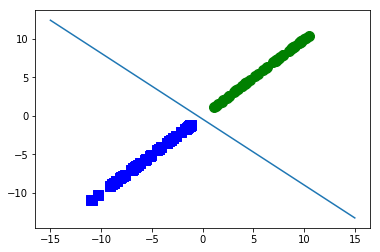

In [2]:
# パーセプトロン
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 予測
def predict(w_vec, x_vec):
    output = np.dot(w_vec, x_vec)
    if output > 0:
        res = 1
    else:
        res = -1
        
    return [res, output]

# 学習
def train(w_vec, x_vec, label):
    [res, output] = predict(w_vec, x_vec)
    lr = 0.5
    if output * label < 0:
        wtmp = w_vec + lr * label * x_vec
        return wtmp
    else:
        return w_vec
    
def create_dataset(item_num):
    x1_1 = np.ones(int(item_num/2)) + 10*np.random.random(int(item_num/2))
    x1_2 = np.ones(int(item_num/2)) + 10*np.random.random(int(item_num/2))
    x2_1 = -np.ones(int(item_num/2)) - 10*np.random.random(int(item_num/2))
    x2_2 = -np.ones(int(item_num/2)) - 10*np.random.random(int(item_num/2))
    z = np.ones(int(item_num/2))
    return np.c_[x1_1, x1_2, z], np.c_[x2_1, x2_2, z]

if __name__=='__main__':
    train_data = 100 # 学習データ
    loop_num = 1000 # ループ回数
    init_w_vec = [1, -1, 1]
    
    x1, x2 = create_dataset(train_data)
    class_x = np.array(np.r_[x1, x2])
    
    # 教師ラベルを1 or -1でふって一つにまとめる
    label_1 = np.ones(int(train_data/2))
    label_2 = -1*np.ones(int(train_data/2))
    label_x = np.array(np.r_[label_1, label_2])
    
    wvec = np.vstack((init_w_vec, init_w_vec))
    
    # ループの数だけ回して重みを学習させる
    for j in range(loop_num):
        for i in range(train_data):
            wvec_new = train(wvec[-1], class_x[i, :], label_x[i])
            wvec = np.vstack((wvec, wvec_new))
    w = wvec[-1]
    
    # 分離直線を引く
    x_fig = range(-15, 16)
    y_fig = [-(w[1]/w[0])*xi-(w[2]/w[1]) for xi in x_fig]
    
    plt.scatter(x1[:, 0], x1[:, 0], marker='o', color='g', s=100)
    plt.scatter(x2[:, 0], x2[:, 0], marker='s', color='b', s=100)
    plt.plot(x_fig, y_fig)
    plt.show()